# Extract from TMDB Pt.2

## Exploratory Data Analysis
- Load in your csv.gz's of results for each year extracted.
 1. Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
 1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
   - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
 2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
 3. What is the average revenue per certification category?
 4. What is the average budget per certification category?

### Imports

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tasks:

### Load in your csv.gz's of results for each year extracted

In [3]:
# Load 2000 file
df1 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', low_memory=False)
df1.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.10,2298.0,PG


In [4]:
# Display 2000 df datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1250 non-null   object 
 1   adult                  1249 non-null   float64
 2   backdrop_path          704 non-null    object 
 3   belongs_to_collection  116 non-null    object 
 4   budget                 1249 non-null   float64
 5   genres                 1249 non-null   object 
 6   homepage               63 non-null     object 
 7   id                     1249 non-null   float64
 8   original_language      1249 non-null   object 
 9   original_title         1249 non-null   object 
 10  overview               1229 non-null   object 
 11  popularity             1249 non-null   float64
 12  poster_path            1134 non-null   object 
 13  production_companies   1249 non-null   object 
 14  production_countries   1249 non-null   object 
 15  rele

In [5]:
# Load 2001 files
df2 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', low_memory=False)
df2.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.330,1217.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.442,130.0,PG-13


In [6]:
# Display 2001 df datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1346 non-null   object 
 1   adult                  1345 non-null   float64
 2   backdrop_path          737 non-null    object 
 3   belongs_to_collection  95 non-null     object 
 4   budget                 1345 non-null   float64
 5   genres                 1345 non-null   object 
 6   homepage               107 non-null    object 
 7   id                     1345 non-null   float64
 8   original_language      1345 non-null   object 
 9   original_title         1345 non-null   object 
 10  overview               1322 non-null   object 
 11  popularity             1345 non-null   float64
 12  poster_path            1219 non-null   object 
 13  production_companies   1345 non-null   object 
 14  production_countries   1345 non-null   object 
 15  rele

### 1. Concatenate Data into 1 DataFrame

In [7]:
# Create one dataframe
final_df = pd.concat([df1, df2], 
                     ignore_index=True)
final_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.10,2298.0,PG


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2596 non-null   object 
 1   adult                  2594 non-null   float64
 2   backdrop_path          1441 non-null   object 
 3   belongs_to_collection  211 non-null    object 
 4   budget                 2594 non-null   float64
 5   genres                 2594 non-null   object 
 6   homepage               170 non-null    object 
 7   id                     2594 non-null   float64
 8   original_language      2594 non-null   object 
 9   original_title         2594 non-null   object 
 10  overview               2551 non-null   object 
 11  popularity             2594 non-null   float64
 12  poster_path            2353 non-null   object 
 13  production_companies   2594 non-null   object 
 14  production_countries   2594 non-null   object 
 15  rele

In [21]:
# Save a final merged .csv.gz of all of the tmdb api data
final_df.to_csv("Data/tmdb_results_combined.csv.gz", compression='gzip', index=False)

## Load New DataFrame

In [29]:
combined_df = pd.read_csv('Data/tmdb_results_combined.csv.gz', low_memory=False)
combined_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.10,2298.0,PG


### Once you have your data from the API, they would like you to perform some light EDA to show:

### 1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

 - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [32]:
# Filter 'budget' column to exclude movies with 0's
combined_df = combined_df[combined_df['budget'] > 0]

In [36]:
# Filter 'revenue' column to exclude movies with 0's
combined_df = combined_df[combined_df['revenue'] > 0]

In [37]:
# Confirm results
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 4 to 2541
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                359 non-null    object 
 1   adult                  359 non-null    float64
 2   backdrop_path          350 non-null    object 
 3   belongs_to_collection  88 non-null     object 
 4   budget                 359 non-null    float64
 5   genres                 359 non-null    object 
 6   homepage               51 non-null     object 
 7   id                     359 non-null    float64
 8   original_language      359 non-null    object 
 9   original_title         359 non-null    object 
 10  overview               359 non-null    object 
 11  popularity             359 non-null    float64
 12  poster_path            359 non-null    object 
 13  production_companies   359 non-null    object 
 14  production_countries   359 non-null    object 
 15  relea

## Exploratory Data Visualizations

### 2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?


In [43]:
combined_df['certification'].value_counts()

R        143
PG-13    117
PG        30
G         13
NR         8
Name: certification, dtype: int64

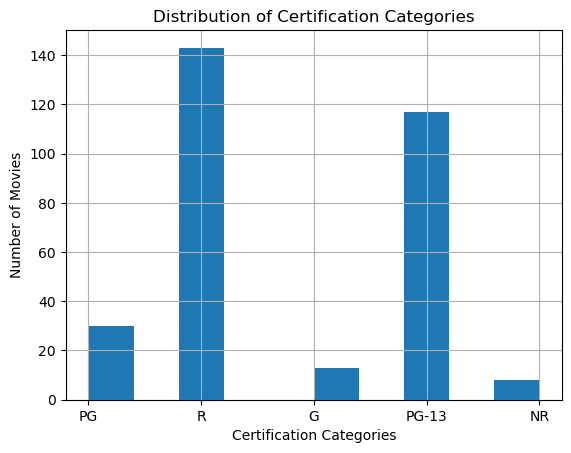

In [48]:
ax = combined_df['certification'].hist()
ax.set_title('Distribution of Certification Categories')
ax.set_xlabel('Certification Categories')
ax.set_ylabel('Number of Movies');

### 3. What is the average revenue per certification category?

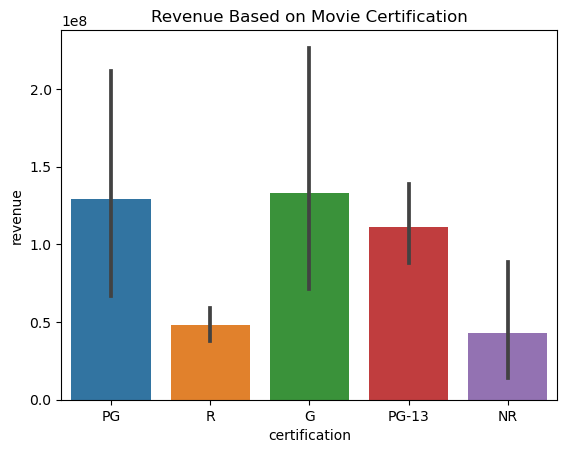

In [40]:
ax = sns.barplot(data=combined_df, x='certification', y='revenue')
ax.set_title("Revenue Based on Movie Certification");

### 4. What is the average budget per certification category?


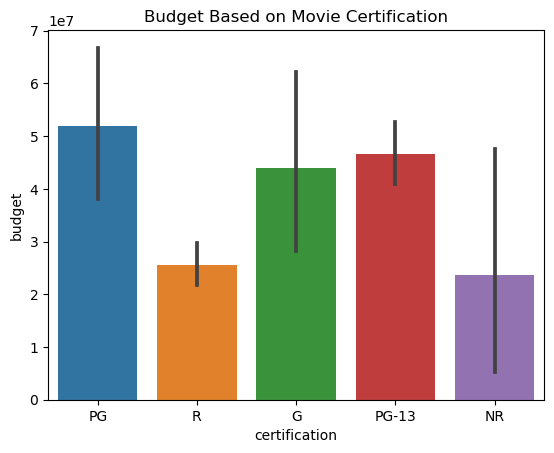

In [41]:
ax = sns.barplot(data=combined_df, x='certification', y='budget')
ax.set_title("Budget Based on Movie Certification");